(-0.5, 10819.5, 14619.5, -0.5)

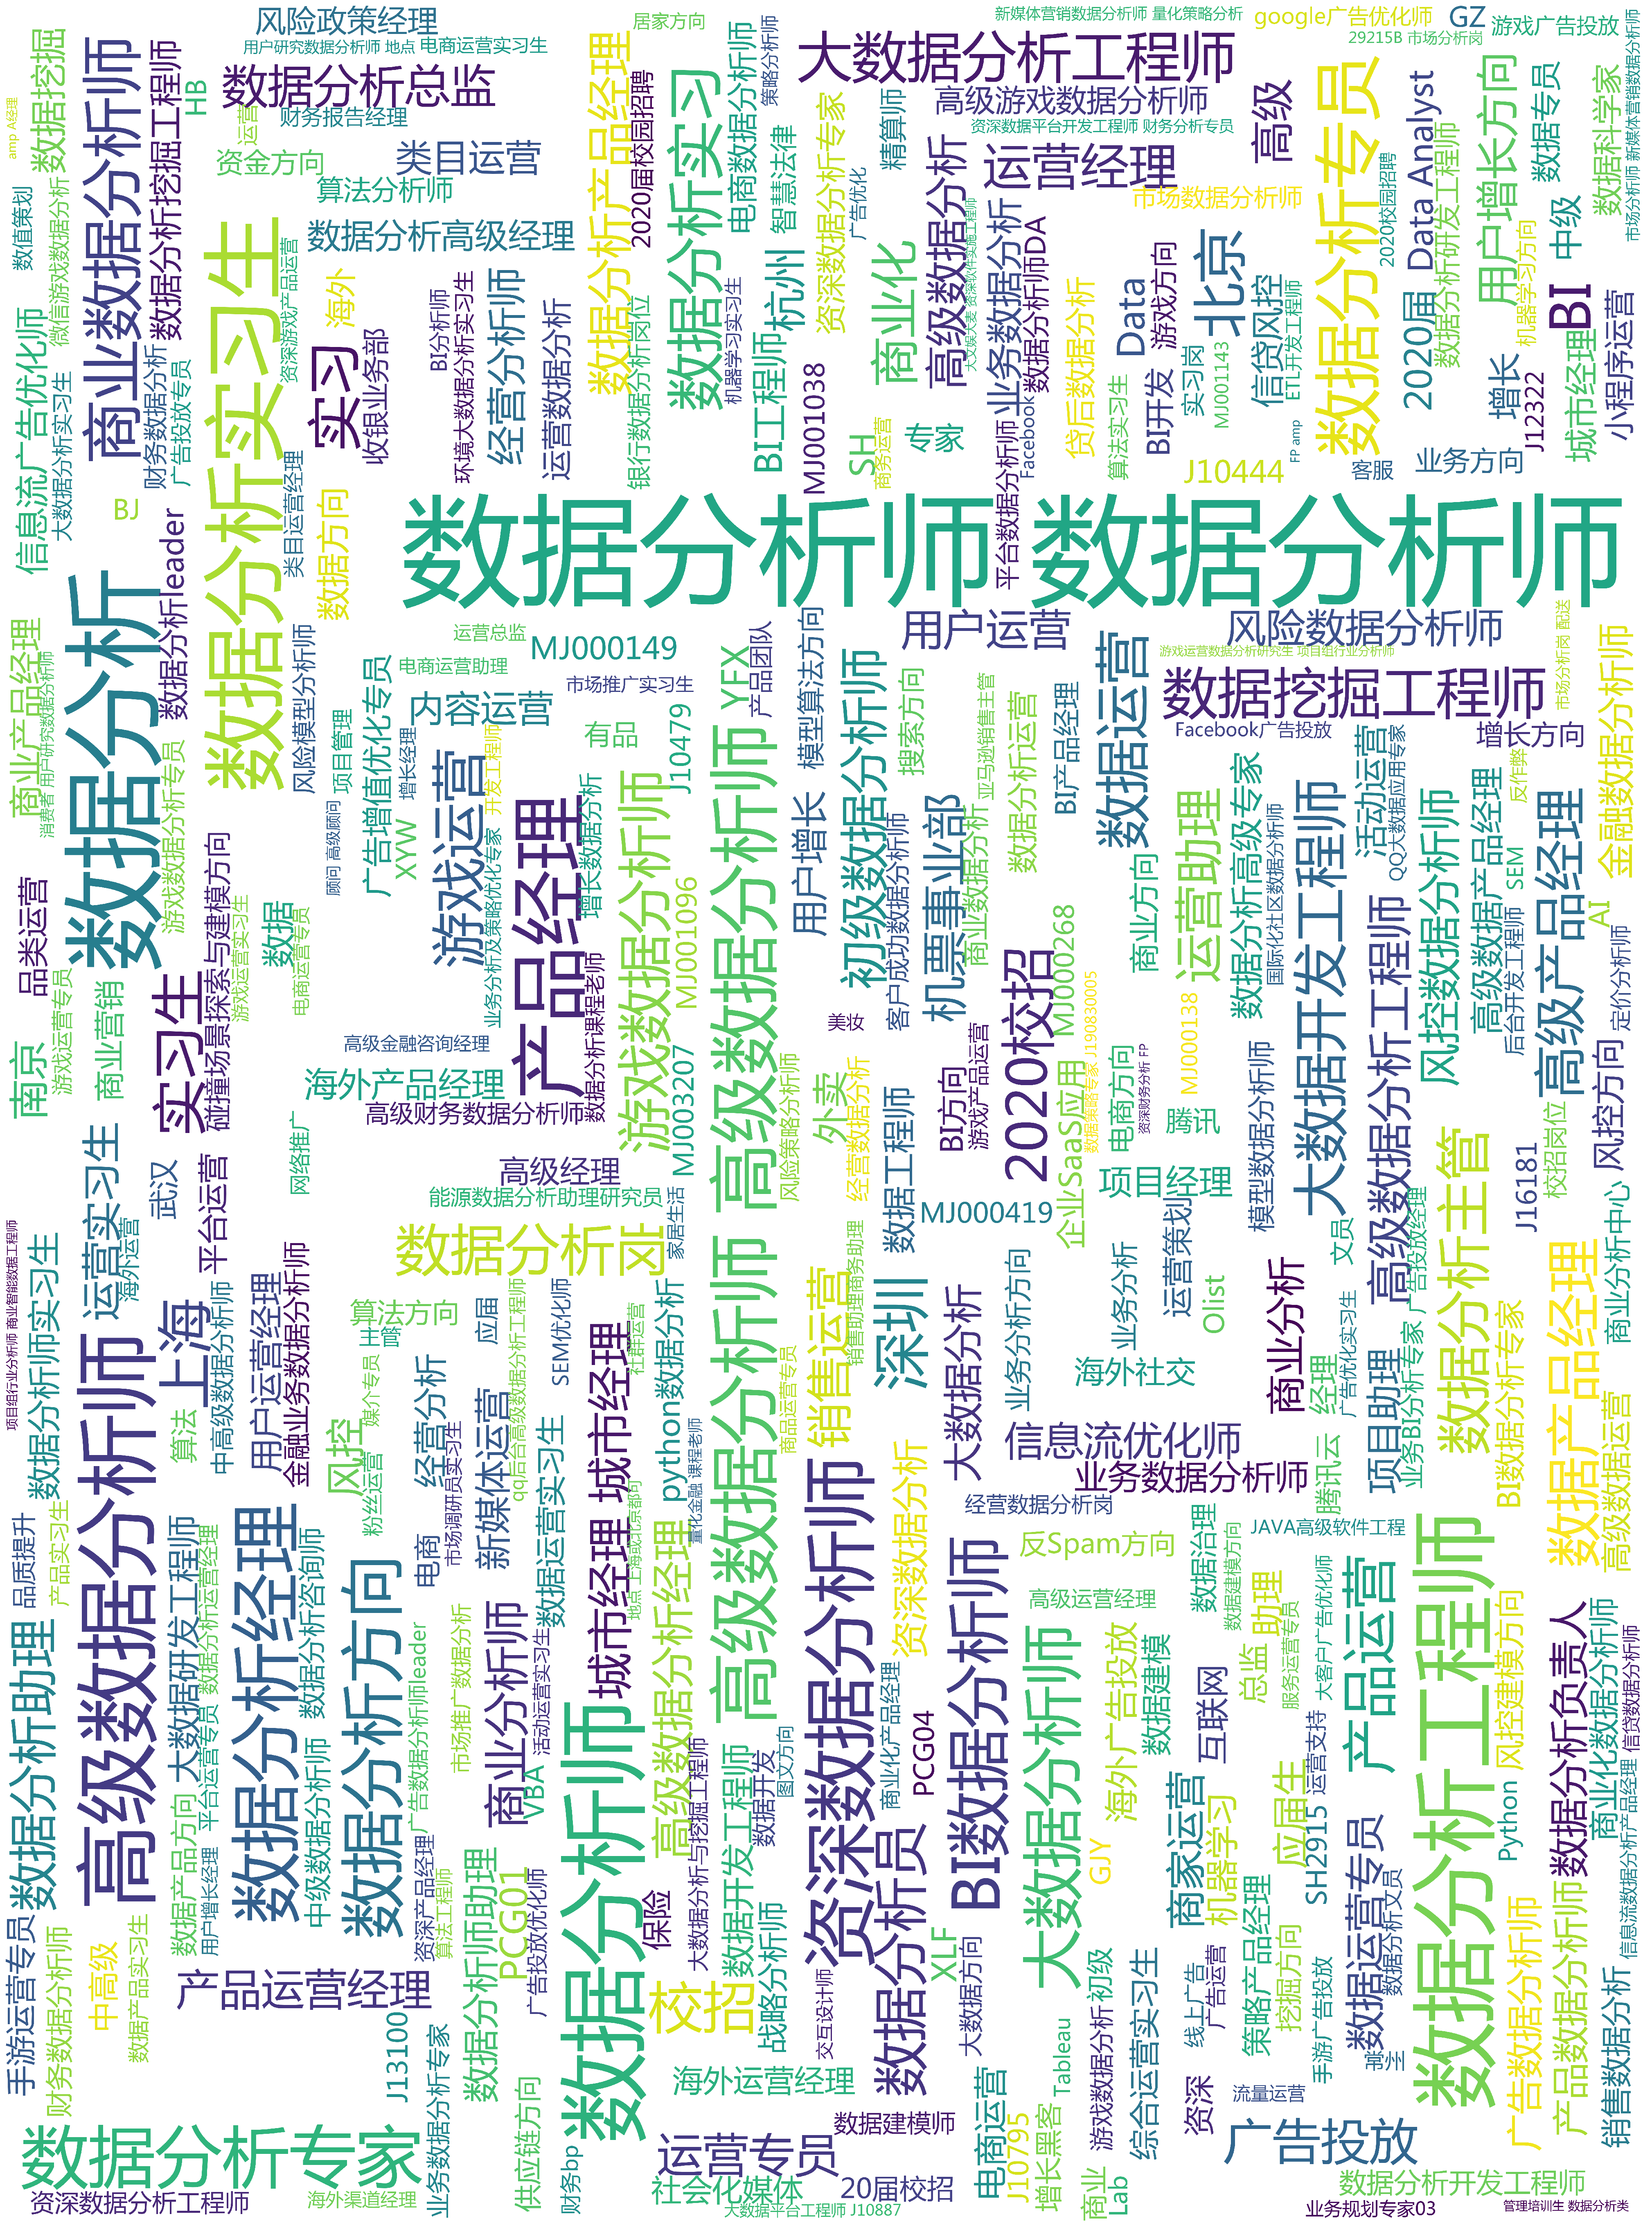

In [16]:
import pymongo
import jieba

from PIL import Image

import numpy as np
import pandas as pd
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt

#  读取原始数据
client = pymongo.MongoClient(host='134.175.151.73', port=27017)
db=client['data']
collection=db.Pull_tick_recruit_data_analyst
dt = collection.find({})
job_name=""
for one in dt:
    job_name=job_name+" "+one['职位名称']

#  读取蒙版
mask = np.array(Image.open('../static/images/girl.jpeg'))
# image_colors = ImageColorGenerator(mask)

# 中文字体
font = "../static/fonts/msyh.ttf"

"""从文本生成词云图"""
wordcloud = WordCloud(
    font_path=font,
    background_color='white',                                       
    height=400,
    width=800,
    scale=20, # 长宽拉伸程度设置为20
    prefer_horizontal=0.2, #  调整水平显示倾向程度为0.2
    mask=mask,
    max_words=1000, # 设置最大字数显示为1000
    relative_scaling=0.3, # 设置字体大小与词频的关联程度为0.3
    max_font_size=80, # 缩小最大字体为80 
    repeat=False
).generate(job_name)

# 绘制
plt.figure(figsize=[120,100])
plt.imshow(wordcloud)
plt.axis('off')

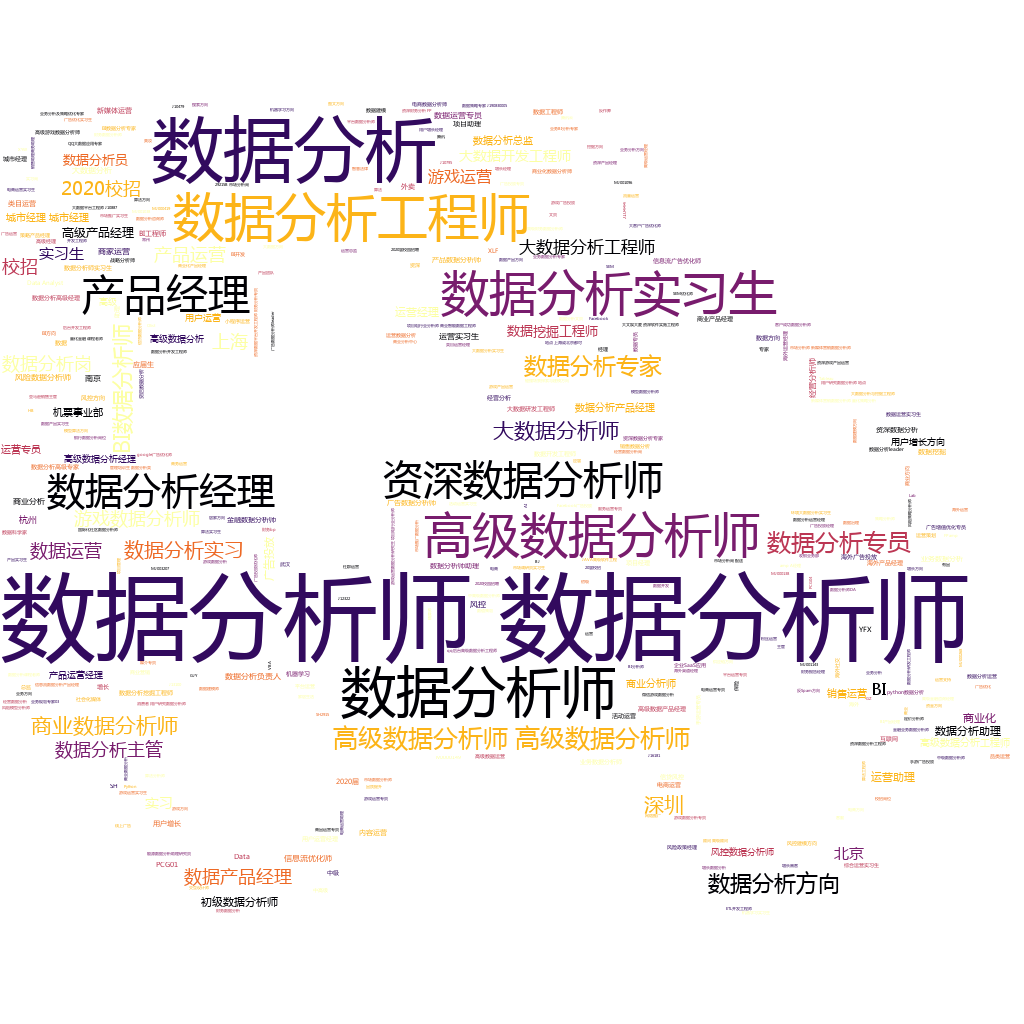

In [6]:
import pymongo

from PIL.Image import open as i_open

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stylecloud
from IPython.display import Image

#  读取原始数据
client = pymongo.MongoClient(host='134.175.151.73', port=27017)
db=client['data']
collection=db.Pull_tick_recruit_data_analyst
dt = collection.find({})
job_name=""
for one in dt:
    job_name=job_name+" "+one['职位名称']


# 中文字体
font = "../static/fonts/msyh.ttf"

# 读取蒙版
# mask = np.array(i_open('../static/images/job.png'))


"""生成词云图"""
stylecloud.gen_stylecloud(
    font_path=font,
    text=job_name,
    size=1024,
    icon_name='fas fa-ambulance', #https://fontawesome.cc 梯子
    palette='matplotlib.Inferno_7', #palettale网站使用，已收藏
    output_name='job_name.png',
    
)

# 显示
Image(filename='job_name.png')